# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice = [1,2,3,4,5,6]
results =[]
for i in range (10):
    results.append(random.choice(dice))
df = pd.DataFrame()
df['results'] = results

#### 2.- Plot the results sorted by value.

In [3]:
sort = df.groupby(results).count()
nums = list(sort.index.values)

<BarContainer object of 5 artists>

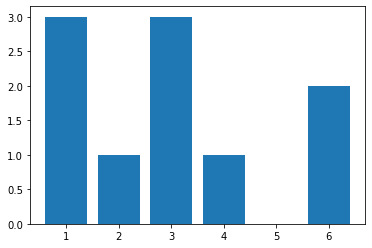

In [4]:
plt.bar(nums, sort['results'])

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<BarContainer object of 5 artists>

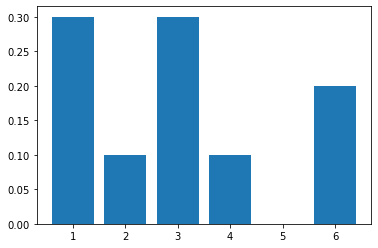

In [5]:
# your code here
sort['relativ_freq'] = sort['results'] / len(results)

plt.bar(nums, sort['relativ_freq'])

In [6]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def handmade_mean(lst):
    return sum(lst)/len(lst)

In [8]:
handmade_mean(results)

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
def dist_mean (value, freq): 
    bob_esponja = 0
    for i in range(len(value)):
        bob_esponja += value[i] * freq[i]
    return round(bob_esponja,2)

In [10]:
freq = list(sort['relativ_freq'])
nums = list(sort['relativ_freq'].index.values)
dist_mean(freq, nums)

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
# your code here
def median (values):
    sor_res = sorted(values)
    if len(sor_res) % 2 == 0:
        return((sor_res[int(len(sor_res)/2)]+sor_res[int(len(sor_res)/2)-1])/2)
    elif len(sor_res) % 2 != 0:
        return(sor_res[int(len(sor_res)/2)-1])

In [12]:
median(results)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here
def quartiles (values):
    quartiles = []
    n = len(values) + 1
    for j in range(1,4):
        quartiles.append(n*(j/4))
        
    return quartiles, (quartiles[2]-quartiles[0])

In [14]:
quartiles(results)

([2.75, 5.5, 8.25], 5.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [15]:
# your code here
dice = pd.read_csv("../data/roll_the_dice_hundred.csv")
dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [16]:
"""
one hundred rolls of a dice 
"""

'\none hundred rolls of a dice \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here
handmade_mean(dice.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [18]:
# your code here
freq = dice.groupby('value').count()
freq

,Unnamed: 0,roll
value,,
1,12,12
2,17,17
3,14,14
4,22,22
5,12,12
6,23,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<BarContainer object of 6 artists>

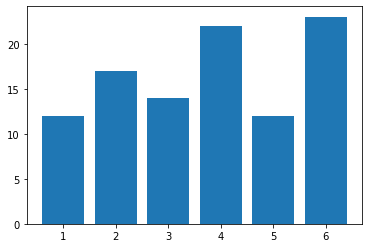

In [19]:
# your code here
plt.bar(freq.index.values, freq.roll)

In [20]:
"""
mean value seems to be almost right in the middle of the distribution
"""

'\nmean value seems to be almost right in the middle of the distribution\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [21]:
# your code here
dice_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")
freq = dice_thousand.groupby('value').count()
freq

,Unnamed: 0,roll
value,,
1,175,175
2,167,167
3,175,175
4,168,168
5,149,149
6,166,166


<BarContainer object of 6 artists>

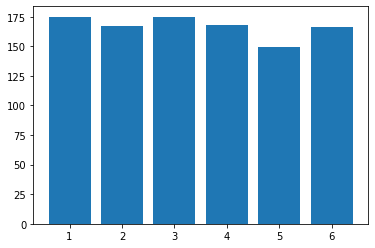

In [22]:
plt.bar(freq.index.values, freq.roll)

In [23]:
"""
less variance on the number of repetitions
"""

'\nless variance on the number of repetitions\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [24]:
# your code here
ages_population = pd.read_csv("../data/ages_population.csv")
ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [25]:
# your code here
ap_mean = handmade_mean(ages_population['observation'])
ap_std = ages_population['observation'].std()
ap_mean, ap_std

(36.56, 12.816499625976762)

In [26]:
"""
yes
"""

'\nyes\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [27]:
# your code here
ages_population2 = pd.read_csv("../data/ages_population2.csv")
ages_population2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [28]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [29]:
ap2_mean = ages_population2['observation'].mean()
ap2_std = ages_population2['observation'].std()
ap2_mean, ap2_std

(27.155, 2.969813932689186)

In [30]:
"""
less mean and variance in the ages. so younger people are observed in this dataset on average and their ages then differ less
"""

'\nless mean and variance in the ages. so younger people are observed in this dataset on average and their ages then differ less\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [31]:
# your code here
ages_population3 = pd.read_csv("../data/ages_population3.csv")
ages_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
# your code here
ap3_mean = ages_population3['observation'].mean()
ap3_std = ages_population3['observation'].std()
ap3_mean, ap3_std

(41.989, 16.144705959865934)

In [33]:
"""
bigger mean and variance in this distribution. older on average, more variance
"""

'\nbigger mean and variance in this distribution. older on average, more variance\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [45]:
# your code here
values = list(ages_population3['observation'])
quartiles(values)

([250.25, 500.5, 750.75], 500.5)

In [35]:
"""

"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [36]:
# your code here

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'